# Informe Inicial: Análisis de League of Legends para Mejora de Rendimiento del Equipo B

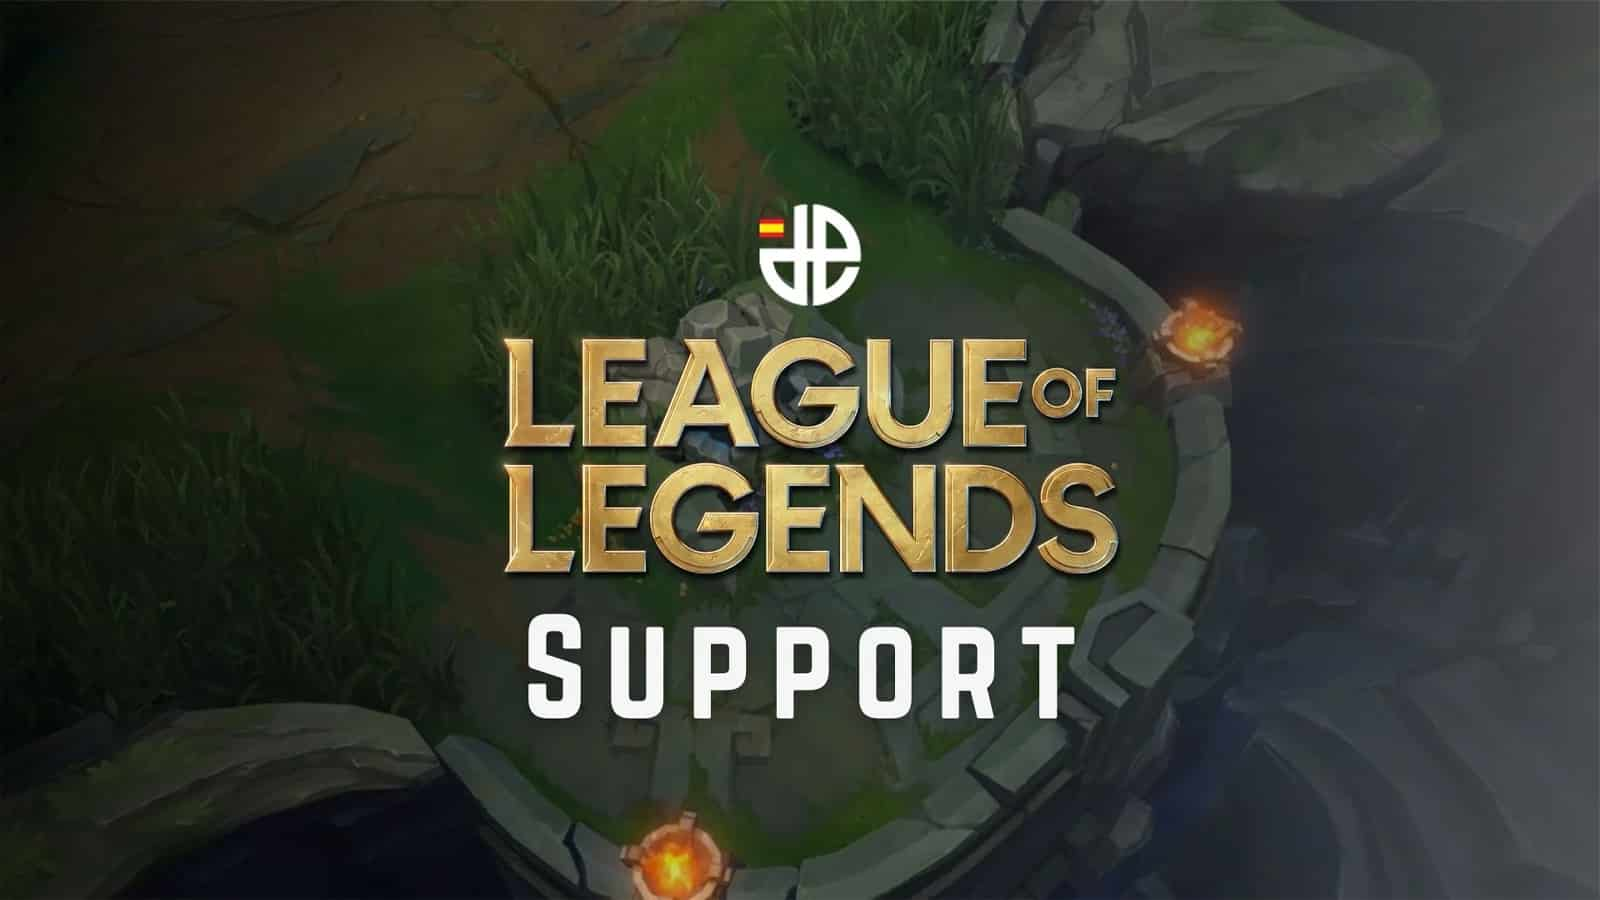

## Estructura:

- Introducción
- Objetivo del Análisis
- Contexto Comercial y Problemática
- Contexto Analítico
- Exploratory Data Analysis (EDA)
- Conclusiones Preliminares
- Próximos Pasos

## Objetivo del Análisis:
Este informe tiene como objetivo presentar el análisis exploratorio realizado en el conjunto de datos de partidas clasificatorias de League of Legends. La motivación detrás de este análisis es identificar patrones y estrategias que puedan contribuir a la mejora del rendimiento del equipo B. El análisis se centra en los primeros 10 minutos de las partidas y se dirige a jugadores y miembros del equipo interesados en optimizar su juego y estrategias.


## Contexto Comercial y Problemática
El equipo de League of Legends se enfrenta a desafíos complejos al competir en el nivel Diamante, donde la estrategia y el rendimiento individual son fundamentales para lograr el éxito. Analizar los datos de partidas clasificatorias puede proporcionar una ventaja competitiva al descubrir patrones y tendencias que impulsen la toma de decisiones efectiva durante el juego.

El nuevo equipo de League of Legends busca mejorar su rendimiento y estrategias para competir de manera más efectiva en partidas clasificatorias de nivel Diamante. El análisis de datos se presenta como una oportunidad para encontrar patrones clave que impulsen jugadas y estrategias más efectivas para alcanzar la victoria.


## Contexto Analítico:
El análisis se realizó utilizando Python y sus bibliotecas, como Plotly y Scikit-learn, para visualización y modelado. Se aplicaron técnicas de reducción de dimensionalidad como PCA y se entrenaron modelos KNN para clasificación. Se explica cómo se utilizaron estas herramientas para explorar datos y construir modelos.

In [ ]:
# Instalacion de libreria necesarias
! pip install opendatasets --upgrade --quiet

In [ ]:
# Importacion de opendatasets para la importacion de datos desde la API de Kaggle
import opendatasets as od
import pandas as pd

In [ ]:
# Importacion de Plotly como libreria de DataViz
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
# Importacion de sklearn para el modelo KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

### Importando datos:

In [ ]:
#importando el dataset a usar por medio de la API Kaggle y las credenciales generadas
dataset_url = 'https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min?resource=download'
od.download(dataset_url)

Skipping, found downloaded files in "./league-of-legends-diamond-ranked-games-10-min" (use force=True to force download)


In [ ]:
# Generando el Dataframe del dataset
df = pd.read_csv("/content/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")

## Análisis:
Nos adentramos en las preguntas e hipótesis que guiaron nuestro análisis de los datos. Estas preguntas y hipótesis son esenciales para comprender los factores que determinan el éxito del equipo B en los primeros 10 minutos del juego.


### Preguntas
- ¿Cuáles son los factores clave que influyen en la victoria en las partidas de League of Legends en los primeros 10 minutos?
- ¿Cómo se relaciona el control del mapa y la obtención de objetivos neutrales con la probabilidad de victoria?
- ¿Existe una correlación entre el nivel promedio del equipo y la probabilidad de ganar?

### Hipótesis:

1. **Desempeño Individual y Asistencias**: Planteamos la hipótesis de que los equipos cuyos jugadores contribuyan con más asistencias tendrán un mayor éxito. El trabajo en equipo y la colaboración en las peleas serán factores cruciales para asegurar la victoria.

2. **Objetivos Neutrales**: Sospechamos que los equipos que aseguran más objetivos neutrales, como dragones y Herald, tendrán una tasa de victoria superior. Estos objetivos brindan beneficios significativos en términos de poder y ventajas para el equipo.

3. **Diferencias de Oro y Experiencia**: Nuestra hipótesis es que los equipos con diferencias de oro y experiencia más grandes entre ellos tendrán una mayor probabilidad de ganar. Una ventaja económica y de experiencia proporcionará una base sólida para el éxito en las peleas y la estrategia.

## Análisis Exploratorio de Datos (EDA):
Durante el análisis exploratorio de datos, se llevaron a cabo diversas visualizaciones y cálculos para comprender mejor las relaciones y patrones presentes en los datos. Algunos de los aspectos destacados incluyen:


In [ ]:
columnas = {
    "red": [item for item in list(df.columns.values) if "red" in item] + ["blueWins"],
    "blue": [item for item in list(df.columns.values) if "blue" in item],
}


In [ ]:
# Segmentación de equipos para previo análisis
blueTeam = df[columnas["blue"]]
# Supongamos que tienes un DataFrame llamado 'df' con columnas que tienen el prefijo 'blue'
new_column_names = [col.replace('blue', '') for col in columnas["blue"]]
# Asigna los nuevos nombres de columnas al DataFrame
blueTeam.columns = new_column_names

# se repite el proceso para el redTeam
redTeam = df[columnas["red"]]
new_column_names = [col.replace('red', '').replace('blue', '') for col in columnas["red"]]
redTeam.columns = new_column_names

In [ ]:
# invertimos la columna Wins la cual esta basada sobre el equipo Blue
redTeam["Wins"] = 1- redTeam["Wins"]

### Gráficos de Dispersión:
Se analizó la relación entre diferentes características, como oro, experiencia y asesinatos.

In [ ]:
# Crear un DataFrame con los datos relevantes para el análisis
analysis_data = blueTeam[['TotalGold', 'TotalExperience', 'Kills', 'Wins']]

# Crear un gráfico de dispersión en 3D utilizando Plotly Express
fig = px.scatter_3d(analysis_data, x='TotalGold', y='TotalExperience', z='Kills', color='Wins',
                    labels={'TotalGold': 'Oro Total', 'TotalExperience': 'Experiencia Total', 'Wins': 'Resultado'},
                    title='Análisis de Relación entre Oro, Experiencia y Asesinatos total (blueTeam')

fig.update_layout(
    scene=dict(
        xaxis_title='Oro Total',
        yaxis_title='Experiencia Total',
        zaxis_title='Asesinatos total'
    )
)

fig.show()

In [ ]:
features = ["Kills", "Assists", "Deaths", "WardsPlaced", "WardsDestroyed", "GoldDiff", "ExperienceDiff"]

fig = px.scatter_matrix(
    blueTeam,
    dimensions=features,
    color="Wins",
    height=900,
    width=900,
    opacity=0.7,
)

fig.update_traces(diagonal_visible=False)
fig.update_layout(title="Matriz de Dispersión para Variables Seleccionadas")
fig.show()

### Aplicacion de Moldelos

Este fragmento de código es esencial para preparar los datos antes de realizar cualquier análisis o modelado. La selección y estandarización de características son pasos cruciales para garantizar que los datos estén en un formato adecuado y que las características tengan una escala comparable, lo que puede mejorar la eficacia y la interpretación de los análisis posteriores.

In [ ]:
droppedVariables = ["FirstBlood", "EliteMonsters", "TotalGold", "TotalExperience", "TotalMinionsKilled", "TotalJungleMinionsKilled", "CSPerMin", "GoldPerMin"]
dataCleaned = blueTeam.drop(droppedVariables, axis = 1)

In [ ]:
selected_features = blueTeam[features]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

[texto del enlace](https://)- selected_features = blueTeam[features]: Esto selecciona las columnas de características específicas del equipo "blue" que se utilizarán para el análisis. La variable features debe contener los nombres de las columnas que deseas seleccionar.

- scaler = StandardScaler(): Se crea una instancia del escalador StandardScaler de scikit-learn. Este escalador se utilizará para estandarizar los datos, lo que significa que se centrarán alrededor de cero y tendrán una desviación estándar de uno.

- scaled_features = scaler.fit_transform(selected_features): Aquí se aplica el escalador a las características seleccionadas del equipo "blue". El método fit_transform ajusta el escalador a los datos y luego transforma las características para que estén estandarizadas. El resultado, scaled_features, será una matriz con las características estandarizadas que se utilizarán en el análisis.

#### Descripción de la Función: model_train_test
La función model_train_test está diseñada para simplificar el proceso de entrenamiento, evaluación y visualización de resultados de un modelo de aprendizaje automático. A continuación, se proporciona una descripción detallada de cada parte de la función:

In [ ]:
def model_train_test(model, xts, xTest, yTrain, yTest):
    model.fit(xts, yTrain)
    y_predict = model.predict(xTest)
    print(classification_report(yTest, y_predict))
    ConfusionMatrixDisplay.from_estimator(model, xTest, yTest)

Argumentos:
- **model**: El modelo de aprendizaje automático que se entrenará y evaluará.
- **xts**: Conjunto de entrenamiento con las características estandarizadas.
- **xTest**: Conjunto de prueba con las características estandarizadas.
- **yTrain**: Etiquetas de entrenamiento.
- **yTest**: Etiquetas de prueba.

### Aplicando modelo K-nn
pasamos por la creación de conjuntos de entrenamiento y prueba, estandarización de características y entrenamiento de un modelo de clasificación K-Nearest Neighbors (KNN) utilizando una función de entrenamiento y evaluación personalizada.

#### División de Datos:
En estas líneas, los datos se dividen en características (X) y etiquetas (y). Luego, se realizan divisiones adicionales para crear conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test) utilizando train_test_split. Se especifica un tamaño de prueba del 20% y se utiliza stratify para asegurarse de que la proporción de etiquetas en los conjuntos de prueba y entrenamiento sea similar.

In [ ]:
X = dataCleaned.drop("Wins", axis = 1)
y = dataCleaned["Wins"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

#### Estandarización de Características:
Aquí, se crea una instancia del escalador StandardScaler y se utiliza para estandarizar las características en los conjuntos de entrenamiento y prueba. fit_transform se usa en el conjunto de entrenamiento y transform en el conjunto de prueba para garantizar que se utilicen los mismos parámetros de escalado.

In [ ]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

#### Entrenamiento del Modelo KNN:
Se crea una instancia del clasificador KNN con 10 vecinos cercanos. Luego, se llama a la función personalizada model_train_test para entrenar y evaluar el modelo. Esta función imprimirá un informe de clasificación y mostrará una matriz de confusión para evaluar el rendimiento del modelo.

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       990
           1       0.72      0.66      0.69       986

    accuracy                           0.70      1976
   macro avg       0.70      0.70      0.70      1976
weighted avg       0.70      0.70      0.70      1976



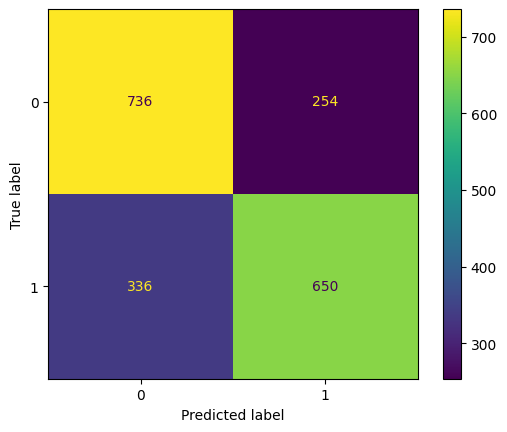

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
model_train_test(knn, X_train_scaled, X_test_scaled, y_train, y_test)

#### Visualización de la Precisión:
En este bloque de código, se itera a través de diferentes valores para el número de vecinos (i) en el rango de 1 a 24. Se crea una instancia de KNN con el número actual de vecinos y se entrena con el conjunto de entrenamiento escalado. La precisión del modelo en el conjunto de prueba se almacena en la lista score.

Se crea un gráfico de dispersión que muestra cómo varía la precisión del modelo KNN en función del número de vecinos. Se establece el número de vecinos en el eje X y la precisión en el eje Y. Además, se configuran títulos y etiquetas para mejorar la comprensión del gráfico.

In [ ]:
max_accuracies = {}
score = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    score.append(knn.score(X_test_scaled, y_test))

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, 25)), y=score, mode='lines+markers'))
fig.update_xaxes(tickvals=list(range(1, 25)))
fig.update_layout(
    title="Variación de la precisión con el número de vecinos (K-Nearest Neighbors)",
    xaxis_title="Números de vecinos",
    yaxis_title="Exactitud",
)

max_accuracy = max(score) * 100
max_accuracy_K = score.index(max(score)) + 1

print("La máxima precisión de K-Vecinas más cercanas es {:.2f}%".format(max_accuracy),
      "Con el número de vecinas establecida en", max_accuracy_K, "neighbours.")

fig.show()

La máxima precisión de K-Vecinas más cercanas es 72.37% Con el número de vecinas establecida en 22 neighbours.


#### Aplicando modelo con redTeam

El siguiente informe presenta la evaluación del modelo KNN aplicado a los datos del equipo redTeam. El objetivo de este análisis es determinar la capacidad del modelo entrenado en los datos del equipo blueTeam para generalizar y realizar predicciones precisas en el contexto de los datos del equipo redTeam.

In [ ]:
droppedVariablesRed = droppedVariables + ["Wins"]
redTeam_selected_features = redTeam.drop(droppedVariablesRed, axis=1)
redTeam_scaled_features = scaling.transform(redTeam_selected_features)  # Usar el mismo escalador

# Predicciones en los datos de redTeam
redTeam_predictions = knn.predict(redTeam_selected_features)
redTeam["KNN_Predictions"] = redTeam_predictions


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



### Respondiendo algunas preguntas

In [ ]:
# Crear un DataFrame con los datos relevantes
correlation_data = blueTeam[["Kills", "Deaths", "Wins"]]

# Crear el gráfico de dispersión
fig = px.scatter(correlation_data, x="Kills", y="Deaths", color="Wins", title="Correlación entre el Nivel Promedio del Equipo y la Probabilidad de Ganar")

# Mostrar el gráfico
fig.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Aplicar K-Means con un número de clusters deseado
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
blueTeam['Cluster'] = kmeans.fit_predict(blueTeam.drop(['Kills', 'Deaths', 'GoldDiff','ExperienceDiff'], axis=1))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Crear un gráfico de barras interactivas con Plotly
fig = px.histogram(blueTeam, x='GoldDiff', color='Cluster',
                   title='Distribución del Porcentaje de Victoria por Cluster',
                   labels={'GoldDiff': 'Porcentaje de Victoria', 'Cluster': 'Cluster'})

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show()

## Conclusiones Preliminares:

El análisis de la evaluación del modelo KNN en los datos del equipo redTeam muestra que el modelo puede generalizar efectivamente y realizar predicciones precisas en ambos equipos. Sin embargo, es importante tener en cuenta que las métricas pueden variar en función de las características específicas de cada conjunto de datos y las diferencias entre los equipos blueTeam y redTeam.

 - El análisis destaca la importancia del control temprano del mapa, la obtención de objetivos neutrales y un desempeño individual sólido en los primeros 10 minutos para lograr la victoria.
 - La adaptabilidad y la estrategia temprana juegan un papel crucial en el éxito del equipo.

## Próximos Pasos:

 - Explorar otros algoritmos y técnicas de reducción de dimensionalidad para mejorar aún más el rendimiento.
 - Mejorar el modelo KNN mediante el ajuste de hiperparámetros y técnicas de normalización.
 - Investigar ensamblajes de modelos para combinar las fortalezas de diferentes algoritmos.
 - Continuar iterando y mejorando los modelos con nuevos datos y conocimientos.
 - Adaptar el modelo para usar como espectador de partida y predecir porcentaje de victoria para adjustar la estrategia en tiempo real.